<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/ml07_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사 하강법(Gradient Descent)

*   머신 러닝의 목적은 목적(비용, 손실) 함수를 최소로 만드는 계수들(w0, w1, ...)들 찾는 것.
*   회귀 문제인 경우 목적 함수는 MSE(w).
*   회귀 문제에서는 w에 대한 2차 함수에서 최솟값의 위치를 찾는 문제와 비슷.
*   경사 하강법: 최솟값의 위치를 찾는 알고리즘 중 하나.
    *   목적 함수의 임의의 위치에서 시작
    *   그 위치에서의 접선의 기울기(gradient)를 계산하고, 접선의 기울기의 절대값이 줄어드는 방향으로 w 값을 변경
        *   접선의 기울기가 양수인 경우에는 왼쪽으로
        *   접선의 기울기가 음수인 경우에는 오른쪽으로
    *   위 과정을 충분히 반복하면 목적함수가 최솟값이 되는 위치 w를 찾을 수 있음.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

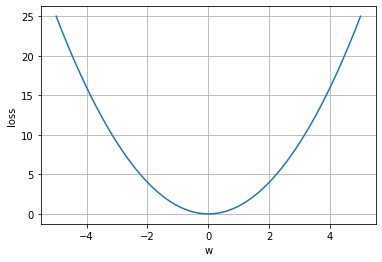

In [2]:
w = np.arange(-5, 5, 0.001)  # [-5, -4.999, -4.998, ..., 4.998, 4.999]
loss = w ** 2

plt.plot(w, loss)
plt.grid()
plt.xlabel('w')
plt.ylabel('loss')
plt.show()

In [7]:
# 임의의 w를 선택
w_init = 4

In [8]:
# 선택한 w에서 목적(손실) 함수의 접선의 기울기 계산
grad = 2 * w_init

In [9]:
# 처음 위치에서 기울기의 반대 방향으로 약간 이동
w_next = w_init - grad * 0.1
w_next

3.2

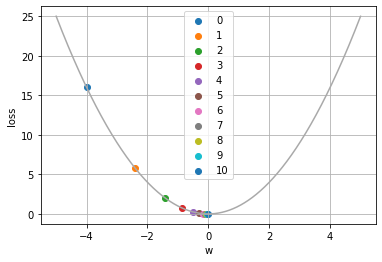

In [23]:
# 목적(손실, 비용) 함수 시각화
w = np.arange(-5, 5, 0.001)
loss = w ** 2
plt.plot(w, loss, color='darkgray')

# loss의 최솟값까지 이동하기 위해서 임의의 w에서 시작
w_init = -4
loss_init = w_init ** 2  # 임의의 시작값에서의 목적 함수 리턴값
plt.scatter(w_init, loss_init, label='0') 

# 학습률: grdient가 감소하는 방향으로 얼마나 빠르게 이동할 지를 결정하는 파라미터
learning_rate = 0.2
for n in range(1, 11):  # 10번 반복
    # 현재 위치에서 gradient를 계산
    grad = 2 * w_init
    # 현재 위치를 gradient가 감소하는 방향으로 약간 이동시킴. 
    w_next = w_init - grad * learning_rate
    # 이동한 위치에서의 loss를 계산(목적함수 리턴값)
    loss_next = w_next ** 2
    plt.scatter(w_next, loss_next, label=f'{n}')
    # 다음 이동 위치를 계산하기 위해서 현재 위치를 바뀐 새 위치로 변경
    w_init = w_next

plt.legend()
plt.grid()
plt.xlabel('w')
plt.ylabel('loss')
plt.show()

__학습률(learning rate) 하이퍼 파라미터__

*   학습률이 작은 경우에는 최솟값을 향해서 천천히 움직임.
*   학습률이 큰 경우에는 최솟값을 향해서 빠르게 또는 불안정하게 움직임.
*   학습률이 너무 작으면 최대 반복 횟수(max_iter) 안에서 최솟값으로 수렴(convergence)하지 못할 수 있음.
    *   수렴할 때까지의 최대 반복 횟수를 늘려줌.
    *   학습률을 키워줌.
*   학습률이 너무 크면 수렴하지 못하고 발산(divergence)하는 경우가 생기기도 함.
    *   학습률을 줄여야 함.
*   ML 알고리즘 중에서는 처음에는 학습률을 크게 하고, 에포크(epoch, 반복)가 진행될 때마다 학습률을 점점 작게 줄여나가는 방식으로 데이터를 학습하는 알고리즘도 있음.
    *   에포크: 전체 훈련 셋의 모든 샘플들에 대해서 gradient를 한 번씩 모두 계산하는 것.


# SGD(Stochastic Gradient Descent, 확률적 경사 하강법)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Fish dataset

In [25]:
# 데이터 셋 저장 경로
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [26]:
fish = pd.read_csv(fish_csv)

In [27]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [28]:
# 농어(Perch) 데이터
perch = fish[fish.Species == 'Perch']
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [29]:
X = perch.iloc[:, 2:].values.copy()
y = perch['Weight'].values.copy()

In [30]:
X[:3]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ]])

In [31]:
y[:3]

array([ 5.9, 32. , 40. ])

In [32]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

In [33]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 4), (14, 4), (42,), (14,))

In [42]:
sgd = SGDRegressor(random_state=42)  # 모델 생성

In [43]:
sgd.fit(X_tr, y_tr)  # 모델 훈련

SGDRegressor(random_state=42)

In [44]:
sgd.coef_

array([-1.58625232e+10, -1.27399754e+10,  2.14580782e+10,  2.13665728e+08])

In [45]:
sgd.intercept_

array([-1.46292378e+10])

In [46]:
tr_pred = sgd.predict(X_tr)

In [47]:
tr_pred[:5]

array([-4.79634299e+11, -5.36174790e+11, -4.46181742e+11, -4.27248527e+11,
       -8.44529958e+11])

In [48]:
sgd.score(X_tr, y_tr)

-4.016900437110443e+18

훈련 셋의 샘플 개수가 너무 작아서 1,000번 반복(epoch)만으로는 최적의 값으로 찾아갈 수 없었음.

해결 방법:
*   최대 반복 횟수를 늘려줌.
*   학습률을 크게 만들어줌.
*   규제의 크기를 줄여줌.

In [50]:
sgd = SGDRegressor(max_iter=1_000_000_000, random_state=42)
sgd.fit(X_tr, y_tr)
sgd.score(X_tr, y_tr)

-4.016900437110443e+18

In [54]:
sgd = SGDRegressor(max_iter=1_000_000_000, 
                   learning_rate='constant', eta0=1.0,
                   random_state=42)
sgd.fit(X_tr, y_tr)
sgd.score(X_tr, y_tr)

-2.795200441965098e+25

In [57]:
sgd = SGDRegressor(max_iter=1_000_000_000, 
                   learning_rate='adaptive', eta0=1.0,
                   random_state=42)
sgd.fit(X_tr, y_tr)
sgd.score(X_tr, y_tr)

-4.3853566245453505e+19